In [1]:
import pandas as pd

In [5]:
df=pd.read_csv("2._gllm-annotation-results.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5082 entries, 0 to 5081
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        5082 non-null   int64 
 1   doi       5082 non-null   object
 2   file      5082 non-null   object
 3   variable  5082 non-null   object
 4   result    5082 non-null   object
dtypes: int64(1), object(4)
memory usage: 198.6+ KB


In [6]:
df[(df.variable=="Q1_0_Tool-Mentioned")].result.value_counts()

,count
result,
Yes,222
No (unclear),20


In [9]:
ids=df[(df.variable=="Q1_0_Tool-Mentioned")&(df.result=="Yes")].id.values
df_rel=df[df.id.isin(ids)]
df_rel.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4662 entries, 0 to 5081
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        4662 non-null   int64 
 1   doi       4662 non-null   object
 2   file      4662 non-null   object
 3   variable  4662 non-null   object
 4   result    4662 non-null   object
dtypes: int64(1), object(4)
memory usage: 218.5+ KB


In [11]:
df_t=df_rel.pivot(index='id', columns='variable', values='result')
df_t.info()

<class 'pandas.core.frame.DataFrame'>
Index: 222 entries, 1868 to 12042
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Q1_0_Tool-Mentioned               222 non-null    object
 1   Q1_1_Tool-Name                    222 non-null    object
 2   Q1_2_Tool-Link                    222 non-null    object
 3   Q1_3_Tool-Reference               222 non-null    object
 4   Q2_0_Tool-Mentioned               222 non-null    object
 5   Q2_1_Tool-Name                    222 non-null    object
 6   Q2_2_Tool-Link                    222 non-null    object
 7   Q2_3_Tool-Reference               222 non-null    object
 8   Q3_1_Approach                     222 non-null    object
 9   Q3_2_Target-specific-Measurement  222 non-null    object
 10  Q3_3_Validation                   222 non-null    object
 11  Q4_1_Opinion-Evaluation           222 non-null    object
 12  Q4_2_Opinion-Target   

In [13]:
df_t["Q1_2_Tool-Link"].value_counts()

,count
Q1_2_Tool-Link,
-,127
https://github.com/google-research/bert,4
https://www.cs.waikato.ac.nz/ml/weka/; -,2
https://code.google.com/archive/p/word2vec/; -,2
https://github.com/nan0606/implicit-aspect-identification,1
...,...
http://www.cfilt.iitb.ac.in/resources/senti/HSWN_downloaderInfo.php,1
https://github.com/tensorflow/tensorflow/tree/master/tensorflow/contrib/android,1
https://spacy.io,1


In [29]:
from collections import Counter
print("No link at all in the paper:",len(df_t[df_t["Q1_2_Tool-Link"]=="-"])," papers")
links=df_t[df_t["Q1_2_Tool-Link"]!="-"]["Q1_2_Tool-Link"].values
link_list = [t.lower().split('; ') for t in links]
new_link_list=[]
count_empthy=0
for i in link_list:
  for j in i:
    if j!="-":
      new_link_list.append(j)
    else:
      count_empthy=count_empthy+1
print ("No link also for some of used tools:",count_empthy, "which were in 18 papers")#which were in 18 papers
#dict_of_links = Counter(x for xs in link_list for x in set(xs))
#dict_of_links.most_common()
Counter(new_link_list).most_common()[:10]

No link at all in the paper: 127  papers
No link also for some of used tools: 32 which were in 18 papers


[('https://github.com/google-research/bert', 5),
 ('https://www.nltk.org/', 5),
 ('https://code.google.com/archive/p/word2vec/', 5),
 ('https://nlp.stanford.edu/projects/glove/', 4),
 ('https://fasttext.cc/', 3),
 ('https://www.cs.waikato.ac.nz/ml/weka/', 3),
 ('https://github.com/cjhutto/vadersentiment', 2),
 ('https://textblob.readthedocs.io/en/dev/', 2),
 ('https://keras.io', 2),
 ('https://scikit-learn.org/', 2)]

In [28]:
from urllib.parse import urlparse

subdomains=[]
for i in new_link_list:
  #print(urlparse(i))
  #>> ParseResult(scheme='http', netloc='github.com', path='/somethings/anything/', params='', query='', fragment='')
  subdomains.append(urlparse(i).netloc)
Counter(subdomains).most_common()

[('github.com', 33),
 ('nlp.stanford.edu', 9),
 ('doi.org', 7),
 ('scikit-learn.org', 6),
 ('www.nltk.org', 6),
 ('code.google.com', 6),
 ('textblob.readthedocs.io', 4),
 ('huggingface.co', 4),
 ('keras.io', 3),
 ('fasttext.cc', 3),
 ('www.cs.waikato.ac.nz', 3),
 ('www.kaggle.com', 2),
 ('spacy.io', 2),
 ('www.tensorflow.org', 2),
 ('www.techscience.com', 1),
 ('aylien.com', 1),
 ('azure.microsoft.com', 1),
 ('www.python.org', 1),
 ('rapidminer.com', 1),
 ('www.electronjs.org', 1),
 ('alt.qcri.org', 1),
 ('arxiv.org', 1),
 ('dl.acm.org', 1),
 ('www.cfilt.iitb.ac.in', 1),
 ('camel.abudhabi.nyu.edu', 1),
 ('weka.wikispaces.com', 1),
 ('sentistrength.wlv.ac.uk', 1),
 ('wtlab.um.ac.ir', 1),
 ('www.ef.uns.ac.rs', 1),
 ('ieee-dataport.org', 1),
 ('corpustext.com', 1),
 ('medium.com', 1),
 ('towardsdatascience.com', 1),
 ('developer.apple.com', 1),
 ('text-processing.com', 1),
 ('radimrehurek.com', 1),
 ('www.cis.uni-muenchen.de', 1),
 ('weka.sourceforge.io', 1),
 ('christophm.github.io', 1),

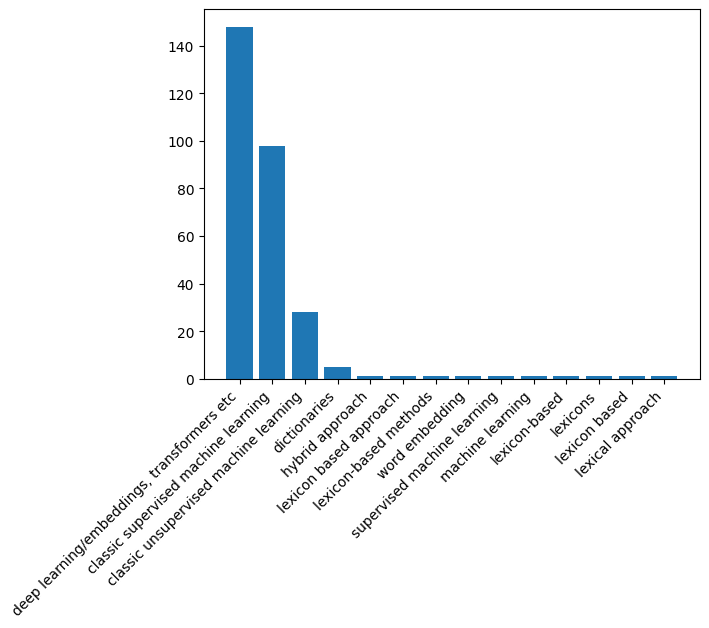

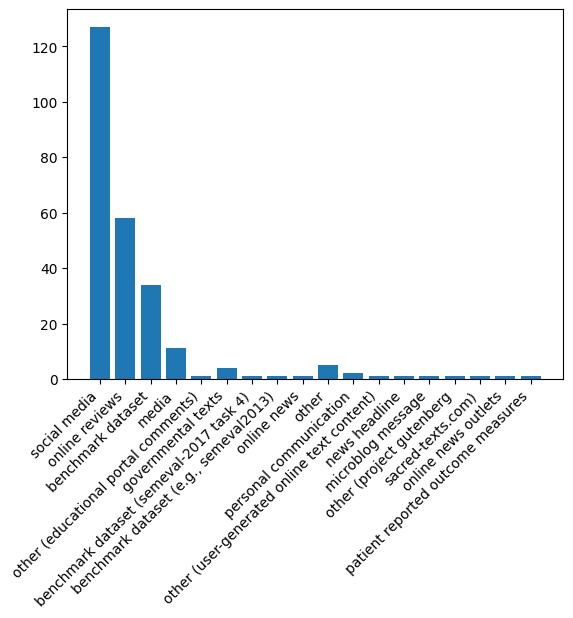

In [38]:
import matplotlib.pyplot as plt
#===========approach
approach=df_t.Q3_1_Approach.values#_counts()
approach_list = [t.lower().split('; ') for t in approach]
dict_of_approach = Counter(x for xs in approach_list for x in set(xs))
dict_of_approach.most_common()


plt.bar(dict_of_approach.keys(), dict_of_approach.values())
plt.xticks(rotation=45, ha='right')
plt.show()
#==========source
#Answers:
#-benchmark dataset (e.g., SemEval2013)
#-Social Media
#-Media
#-Governmental texts
#-Online Reviews
#-Personal Communication (e.g., emails, messenger texts)
#-Other (write in)

source=df_t["Q5_1_Data-Source"].values#_counts()
source_list = [t.lower().split('; ') for t in source]
dict_of_source = Counter(x for xs in source_list for x in set(xs))
dict_of_source.most_common()


plt.bar(dict_of_source.keys(), dict_of_source.values())
plt.xticks(rotation=45, ha='right');

#language,country - small adjusements needed
